In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

#plt.style.use('bmh')

In [2]:
df = pd.read_csv('data_exploration_2.csv', low_memory=False, index_col = 'ref')
df.head()

,V203,V191,V212,V202,V187,V185,V186,V180,V242,V167,...,V149,V238,V154,V161,V234,V194,V207,V173,V174,y
ref,,,,,,,,,,,,,,,,,,,,,
201390679,0.0,7.0,199.0,27.0,9999.0,113.0,9999.0,9999.0,15.0,7.0,...,0,1,1,0,0,4,6,0,0,0
201390959,0.0,4.0,688.0,47.0,9999.0,1.0,9999.0,9999.0,32.0,7.0,...,0,0,0,0,0,0,0,0,0,0
201397626,0.0,11.0,1140.0,36.0,9999.0,130.0,9999.0,9999.0,32.0,7.0,...,0,0,0,0,1,5,0,0,0,0
201397742,99.0,8.0,872.0,25.0,9999.0,69.0,9999.0,9999.0,28.0,3.0,...,0,0,0,0,0,0,1,0,0,0
201401345,0.0,8.0,1143.0,33.0,28.0,181.0,110.0,19.0,18.0,8.0,...,0,0,0,0,0,10,9,0,0,0


Balanceo de la variable respuesta

In [3]:
from sklearn.utils import resample

In [4]:
df['y'].value_counts()

0    102703
1      1211
Name: y, dtype: int64

Separar la clase mayoritaria y minoritaria de la variable respuesta

In [5]:
# UpSampling
df_majority = df[df.y==0]
df_minority = df[df.y==1]

Upsample clase minoritaria

In [6]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # muestra con reemplazamiento
                                 n_samples=102703,    # hasta la clase mayoritaria
                                 random_state=123) 

Combinar la clase mayoritaria con la muestra de la clase minoritaria

In [7]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.y.value_counts()

1    102703
0    102703
Name: y, dtype: int64

El nuevo Dataframe tiene más observaciones que el original, y el ratio de las dos clases de la variable respuesta es ahora 1:1

Down-Sample clase mayoritaria

In [8]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # muestra sin reemplazamiento
                                 n_samples=1211,     # hasta la clase minoritaria
                                 random_state=123) 

Combinar la clase minoritaria con la muestra de la clase mayoritaria

In [9]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.y.value_counts()

1    1211
0    1211
Name: y, dtype: int64

Importancia de las variables y selección

In [10]:
X_up = df_upsampled[df_upsampled.columns[:-1]]
y_up = df_upsampled['y']


In [11]:
seed = 7

Feature ranking:
1. feature 62 (0.102744)
2. feature 18 (0.063529)
3. feature 46 (0.059097)
4. feature 64 (0.055788)
5. feature 45 (0.055639)
6. feature 14 (0.045793)
7. feature 76 (0.044943)
8. feature 2 (0.043734)
9. feature 71 (0.043185)
10. feature 90 (0.036315)
11. feature 114 (0.035213)
12. feature 72 (0.032754)
13. feature 19 (0.020904)
14. feature 40 (0.020836)
15. feature 15 (0.020691)
16. feature 113 (0.017814)
17. feature 6 (0.016237)
18. feature 9 (0.015551)
19. feature 0 (0.013624)
20. feature 12 (0.012660)
21. feature 10 (0.012636)
22. feature 70 (0.012046)
23. feature 69 (0.011691)
24. feature 7 (0.011338)
25. feature 39 (0.008011)
26. feature 1 (0.007689)
27. feature 86 (0.007366)
28. feature 20 (0.007269)
29. feature 77 (0.006566)
30. feature 27 (0.005938)
31. feature 16 (0.005930)
32. feature 65 (0.005581)
33. feature 34 (0.005551)
34. feature 91 (0.005548)
35. feature 26 (0.005401)
36. feature 38 (0.004668)
37. feature 81 (0.004662)
38. feature 8 (0.004636)
39. featu

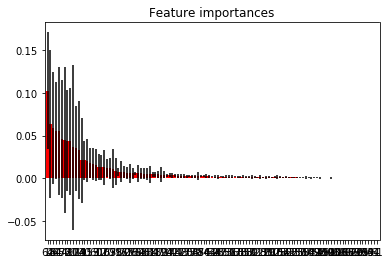

In [12]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to the data
model = ExtraTreesClassifier(random_state = seed)
model.fit(X_up, y_up)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

#df_ETC =pd.DataFrame()
for f in range(X_up.shape[1]):
#    df_ETC = pd.concat(X[X.columns[:f]], axis = 1)
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]] ))
    
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_up.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_up.shape[1]), indices)
plt.xlim([-1, X_up.shape[1]])
plt.show()
# display the relative importance of each attribute
#print(model.feature_importances_)


In [13]:
X_dwn = df_downsampled[df_downsampled.columns[:-1]]
y_dwn = df_downsampled['y']


Feature ranking:
1. feature 62 (0.140149)
2. feature 46 (0.066204)
3. feature 18 (0.057097)
4. feature 90 (0.049185)
5. feature 14 (0.048999)
6. feature 113 (0.038934)
7. feature 45 (0.038692)
8. feature 64 (0.037074)
9. feature 10 (0.036739)
10. feature 71 (0.036051)
11. feature 76 (0.035676)
12. feature 2 (0.033316)
13. feature 19 (0.033019)
14. feature 114 (0.024171)
15. feature 72 (0.020953)
16. feature 20 (0.014381)
17. feature 39 (0.011894)
18. feature 7 (0.011615)
19. feature 8 (0.010651)
20. feature 16 (0.009970)
21. feature 110 (0.009453)
22. feature 86 (0.008803)
23. feature 112 (0.008669)
24. feature 11 (0.008630)
25. feature 12 (0.007819)
26. feature 9 (0.007475)
27. feature 43 (0.007186)
28. feature 27 (0.006960)
29. feature 89 (0.006721)
30. feature 33 (0.006571)
31. feature 41 (0.006160)
32. feature 34 (0.006089)
33. feature 6 (0.005725)
34. feature 0 (0.005636)
35. feature 65 (0.005600)
36. feature 40 (0.005582)
37. feature 1 (0.005527)
38. feature 68 (0.005013)
39. fea

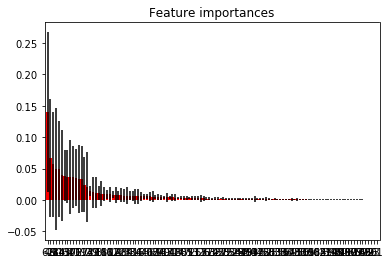

In [14]:
model.fit(X_dwn, y_dwn)
importances2 = model.feature_importances_
std2 = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices2 = np.argsort(importances2)[::-1]

# Print the feature ranking
print("Feature ranking:")

#df_ETC =pd.DataFrame()
for f in range(X_dwn.shape[1]):
#    df_ETC = pd.concat(X[X.columns[:f]], axis = 1)
    print("%d. feature %d (%f)" % (f + 1, indices2[f], importances2[indices2[f]] ))
    
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_dwn.shape[1]), importances2[indices2],
       color="r", yerr=std2[indices2], align="center")
plt.xticks(range(X_dwn.shape[1]), indices2)
plt.xlim([-1, X_dwn.shape[1]])
plt.show()
# display the relative importance of each attribute


In [15]:
importances > 0.01

array([ True, False,  True, False, False, False,  True,  True, False,
        True,  True, False,  True, False,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False,  True,  True,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False], dtype=bool)

In [16]:
col_X = X_up.columns.values.tolist()

Variables cuya importancia sea  > 0.01

In [17]:
col_FI_up = []
count = 0
for i in indices:
    if importances[indices[i]] > 0.01:
        col_FI_up.append(col_X[i])
        count += importances[indices[i]]

In [18]:
count

0.8047624378455176

In [19]:
col_FI_up

['V240',
 'V182',
 'V212',
 'V241',
 'V245',
 'V186',
 'V167',
 'V203',
 'V243',
 'V189',
 'V180',
 'V191',
 'V169',
 'V244',
 'V242',
 'V188',
 'V239',
 'V226',
 'V185',
 'V187',
 'V231',
 'V196',
 'V220',
 'V202']

Dataframe - Feature importances - Upsampled

In [20]:
df_FI_up = X_up[col_FI_up]
df_FI_up.head()

,V240,V182,V212,V241,V245,V186,V167,V203,V243,V189,...,V242,V188,V239,V226,V185,V187,V231,V196,V220,V202
ref,,,,,,,,,,,,,,,,,,,,,
201390679,9999.0,3000.0,199.0,9999.0,13.0,9999.0,7.0,0.0,10.0,9999.0,...,15.0,8.0,0.0,3.0,113.0,9999.0,945.0,3.0,102003.0,27.0
201390959,9999.0,1000.0,688.0,9999.0,0.0,9999.0,7.0,0.0,2.0,9999.0,...,32.0,2.0,15.0,5.0,1.0,9999.0,1530.0,2.0,32005.0,47.0
201397626,9999.0,19000.0,1140.0,9999.0,0.0,9999.0,7.0,0.0,2.0,9999.0,...,32.0,2.0,12.0,3.0,130.0,9999.0,1202.0,2.0,92002.0,36.0
201397742,9999.0,3000.0,872.0,9999.0,0.0,9999.0,3.0,99.0,3.0,9999.0,...,28.0,3.0,14.0,5.0,69.0,9999.0,1324.0,1.0,42002.0,25.0
201401345,5.0,5000.0,1143.0,5.0,11.0,110.0,8.0,0.0,5.0,1.0,...,18.0,4.0,0.0,3.0,181.0,28.0,1205.0,1.0,112004.0,33.0


Variables cuya importancia sea > 0.01

In [21]:
col_FI_dwn = []
count2 = 0
for i in indices2:
    if importances2[indices2[i]] > 0.01:
        col_FI_dwn.append(col_X[i])
        count2 += importances2[indices2[i]]

In [22]:
count2

0.74480149516753991

In [23]:
col_FI_dwn

['V240',
 'V182',
 'V189',
 'V212',
 'V180',
 'V242',
 'V244',
 'V188',
 'V243',
 'V167',
 'V186',
 'V203',
 'V191',
 'V245',
 'V196',
 'V239',
 'V185',
 'V202',
 'V187']

In [24]:
col_X



['V203',
 'V191',
 'V212',
 'V202',
 'V187',
 'V185',
 'V186',
 'V180',
 'V242',
 'V167',
 'V189',
 'V188',
 'V243',
 'V196',
 'V182',
 'V245',
 'V244',
 'V239',
 'V240',
 'V241',
 'V169',
 'V226',
 'V220',
 'V231',
 'V222',
 'V172',
 'V224',
 'V216',
 'V219',
 'V221',
 'V227',
 'V214',
 'V233',
 'V246',
 'V232',
 'V197',
 'V181',
 'V178',
 'V228',
 'V229',
 'V201',
 'V211',
 'V192',
 'V168',
 'V184',
 'V171',
 'V225',
 'V200',
 'X14',
 'X13',
 'X16',
 'X9',
 'X8',
 'X11',
 'X1',
 'X3',
 'X2',
 'X17',
 'X21',
 'X18',
 'X19',
 'X20',
 'V209_encoded',
 'V183_encoded',
 'V210_encoded',
 'V175_encoded',
 'V176_encoded',
 'V198_encoded',
 'V190_encoded',
 'V193_encoded',
 'V204_encoded',
 'V218_encoded',
 'V230_encoded',
 'V217_encoded',
 'V223_encoded',
 'V215_encoded',
 'V170_encoded',
 'V177_encoded',
 'V163_encoded',
 'V164_encoded',
 'V165_encoded',
 'V166_encoded',
 'X12_encoded',
 'X7_encoded',
 'X4_encoded',
 'V213',
 'V208',
 'V205',
 'V206',
 'V179',
 'V199',
 'V195',
 'V146',
 'V

Dataframe - Feature importances - Downsampled

In [25]:
df_FI_dwn = X_dwn[col_FI_dwn]
df_FI_dwn.head()

,V240,V182,V189,V212,V180,V242,V244,V188,V243,V167,V186,V203,V191,V245,V196,V239,V185,V202,V187
ref,,,,,,,,,,,,,,,,,,,
220901784,1.0,9000.0,3.0,1135.0,30.0,20.0,10.0,4.0,5.0,3.0,168.0,0.0,28.0,0.0,1.0,10.0,309.0,43.0,44.0
234159801,36.0,3000.0,1.0,1137.0,18.0,28.0,21.0,3.0,3.0,3.0,67.0,0.0,33.0,5.0,1.0,16.0,513.0,60.0,24.0
215190020,9999.0,11000.0,9999.0,1125.0,9999.0,14.0,18.0,2.0,2.0,6.0,9999.0,99.0,28.0,16.0,5.0,2.0,327.0,45.0,9999.0
212357512,9999.0,9000.0,9999.0,198.0,9999.0,15.0,14.0,8.0,10.0,7.0,9999.0,0.0,43.0,0.0,2.0,14.0,36.0,30.0,9999.0
232902445,6.0,9000.0,2.0,1136.0,18.0,27.0,0.0,4.0,5.0,2.0,154.0,0.0,8.0,0.0,2.0,0.0,83.0,25.0,31.0


### MODELOS

**ASAP: As Simple As Possible**

In [28]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

UPSAMPLED

In [29]:
model_up = linear_model.LogisticRegression(random_state = seed)
model_up.fit(df_FI_up,y_up)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=7, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predicciones

In [30]:
predictions_up = model_up.predict(df_FI_up)
print(predictions_up[0:10])

[1 1 0 0 0 0 0 0 0 0]


In [31]:
y_up[0:10]

ref
201390679    0
201390959    0
201397626    0
201397742    0
201401345    0
201402181    0
201403985    0
201404213    0
201405542    0
201405827    0
Name: y, dtype: int64

In [32]:
model_up.score(df_FI_up,y_up)

0.93568347565309684

Train / Test

In [33]:
test_size = 0.20

X_train_up, X_test_up, Y_train_up, Y_test_up = model_selection.train_test_split(df_FI_up, y_up, test_size=test_size, random_state=seed)


Cross-validation

In [34]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model_up, X_train_up, Y_train_up, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)


Logistic Regression: 0.935950 (0.001500)


Predicciones

In [35]:
predictions_up1 = model_up.predict(X_test_up)


In [36]:
print(model_up.score(X_train_up, Y_train_up))

0.935468951583


Accuracy

In [37]:
print(accuracy_score(Y_test_up, predictions_up1))

0.936541551044


Matriz de confusión

In [73]:
print(confusion_matrix(Y_test_up, predictions_up1))

[[19082  1445]
 [ 1162 19393]]


In [40]:
from pandas_ml import ConfusionMatrix

In [41]:
ConfusionMatrix(Y_test_up.tolist(), predictions_up1)

Predicted      0      1  __all__
Actual                          
0          19082   1445    20527
1           1162  19393    20555
__all__    20244  20838    41082

f1-score

In [42]:
print(classification_report(Y_test_up, predictions_up1))

             precision    recall  f1-score   support

          0       0.94      0.93      0.94     20527
          1       0.93      0.94      0.94     20555

avg / total       0.94      0.94      0.94     41082



DOWNSAMPLED

In [43]:
model_dwn = linear_model.LogisticRegression(random_state = seed)
model_dwn.fit(df_FI_dwn,y_dwn)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=7, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predicciones

In [44]:
predictions_dwn = model_dwn.predict(df_FI_dwn)
print(predictions_dwn[0:10])

[0 0 0 0 0 0 0 0 0 0]


In [45]:
y_dwn[0:10]

ref
220901784    0
234159801    0
215190020    0
212357512    0
232902445    0
236278777    0
204326101    0
224675612    0
204066333    0
218689326    0
Name: y, dtype: int64

In [46]:
model_dwn.score(df_FI_dwn,y_dwn)

0.91618497109826591

Train / Test

In [47]:
test_size = 0.20

X_train_dwn, X_test_dwn, Y_train_dwn, Y_test_dwn = model_selection.train_test_split(df_FI_dwn, y_dwn, test_size=test_size, random_state=seed)


Cross-validation

In [48]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results_dwn = model_selection.cross_val_score(model_dwn, X_train_dwn, Y_train_dwn, cv=kfold, scoring='accuracy')
msg_dwn = "%s: %f (%f)" % (name, cv_results_dwn.mean(), cv_results_dwn.std())
print(msg_dwn)


Logistic Regression: 0.914305 (0.020923)


Predicciones

In [49]:
predictions_dwn1 = model_dwn.predict(X_test_dwn)


In [50]:
print(model_dwn.score(X_train_dwn, Y_train_dwn))

0.917398038203


Accuracy

In [51]:
print(accuracy_score(Y_test_dwn, predictions_dwn1))

0.911340206186


Matriz de confusión

In [52]:
print(confusion_matrix(Y_test_dwn, predictions_dwn1))

[[211  26]
 [ 17 231]]


In [53]:
ConfusionMatrix(Y_test_dwn.tolist(), predictions_dwn1)

Predicted    0    1  __all__
Actual                      
0          211   26      237
1           17  231      248
__all__    228  257      485

f1-score

In [54]:
print(classification_report(Y_test_dwn, predictions_dwn1))

             precision    recall  f1-score   support

          0       0.93      0.89      0.91       237
          1       0.90      0.93      0.91       248

avg / total       0.91      0.91      0.91       485



### MEJOR MODELO POSIBLE

SVM

In [77]:
from sklearn import svm

UPSAMPLED

In [78]:
classifier_up = svm.SVC(kernel='linear', random_state = seed) # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)

In [79]:
classifier_up.fit(X_train_up, Y_train_up)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Predicciones

In [80]:
svm_pred_up = classifier_up.predict(X_test_up)
print(classifier_up.score(X_train_up, Y_train_up))

0.926066794869


Accuracy

In [81]:
print(accuracy_score(Y_test_up, svm_pred_up))

0.927291757948


Matriz de confusión

In [82]:
print(confusion_matrix(Y_test_up, svm_pred_up))

[[18536  1991]
 [  996 19559]]


In [83]:
from pandas_ml import ConfusionMatrix
ConfusionMatrix(Y_test_up.tolist(), svm_pred_up)


Predicted      0      1  __all__
Actual                          
0          18536   1991    20527
1            996  19559    20555
__all__    19532  21550    41082

In [84]:
print(classification_report(Y_test_up, svm_pred_up))

             precision    recall  f1-score   support

          0       0.95      0.90      0.93     20527
          1       0.91      0.95      0.93     20555

avg / total       0.93      0.93      0.93     41082



SVM Downsampled

In [50]:
classifier.fit(X_train_dwn, Y_train_dwn)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Predicciones

In [79]:
svm_pred_dwn = classifier.predict(X_test_dwn)

In [80]:
print(classifier.score(X_train_dwn, Y_train_dwn))

0.912751677852


Accuracy

In [81]:
print(accuracy_score(Y_test_dwn, svm_pred_dwn))

0.898969072165


Matriz de confusión

In [82]:
print(confusion_matrix(Y_test_dwn, svm_pred_dwn))

[[208  29]
 [ 20 228]]


In [83]:
ConfusionMatrix(Y_test_dwn.tolist(), svm_pred_dwn)

Predicted    0    1  __all__
Actual                      
0          208   29      237
1           20  228      248
__all__    228  257      485

SVM optimizar parámetros. Rejilla

In [78]:
param_grid = [
  {'C': [1, 10], 'kernel': ['linear']},
  {'C': [1, 10], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [ ]:
from sklearn.grid_search import GridSearchCV

svm = svm.SVC(random_state=1988)

# crear grid search
gs = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy',
                  cv=5,n_jobs=-1)

# comenzar el ajuste
gs_up = gs.fit(X_train_up, Y_train_up)

In [ ]:
# imprimir resultados
print(gs_up.best_score_)
print(gs_up.best_params_)

In [ ]:
# utilizando el mejor modelo
mejor_modelo_up = gs_up.best_estimator_
mejor_modelo_up.fit(x_train_up, Y_train_up)
print('Precisión: {0:.3f}'.format(mejor_modelo_up.score(X_test_up, Y_test_up)))


SVM DOWNSAMPLED

In [ ]:
gs_dwn = gs.fit(x_train_dwn, Y_train_dwn)

In [ ]:
# imprimir resultados
print(gs_dwn.best_score_)
print(gs_dwn.best_params_)

In [ ]:
# utilizando el mejor modelo
mejor_modelo_dwn = gs_dwn.best_estimator_
mejor_modelo_dwn.fit(x_train_dwn, Y_train_dwn)
print('Precisión: {0:.3f}'.format(mejor_modelo_dwn.score(X_test_dwn, Y_test_dwn)))


RANDOM FOREST UP

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf_up = RandomForestClassifier(n_estimators=200, random_state = seed)
rf_up.fit(X_train_up, Y_train_up)

rf_pred_up = rf_up.predict(X_test_up)

In [57]:
print(rf_up.score(X_train_up, Y_train_up))

1.0


Accuracy

In [58]:
print("Accuracy:",metrics.accuracy_score(Y_test_up, rf_pred_up))

Accuracy: 0.999415802541


Matriz de confusión

In [71]:
print(confusion_matrix(Y_test_up, rf_pred_up))

[[20503    24]
 [    0 20555]]


In [60]:
ConfusionMatrix(Y_test_up.tolist(), rf_pred_up)

Predicted      0      1  __all__
Actual                          
0          20503     24    20527
1              0  20555    20555
__all__    20503  20579    41082

RANDOM FOREST DOWN

In [61]:
rf_dwn = RandomForestClassifier(n_estimators=200, random_state = seed)
rf_dwn.fit(X_train_dwn, Y_train_dwn)
rf_pred_dwn = rf_dwn.predict(X_test_dwn)

In [62]:
print(rf_dwn.score(X_train_dwn, Y_train_dwn))

1.0


Accuracy

In [63]:
print("Accuracy:",metrics.accuracy_score(Y_test_dwn, rf_pred_dwn))

Accuracy: 0.960824742268


Matriz de confusión

In [64]:
print(confusion_matrix(Y_test_dwn, rf_pred_dwn))

[[228   9]
 [ 10 238]]


In [65]:
ConfusionMatrix(Y_test_dwn.tolist(), rf_pred_dwn)

Predicted    0    1  __all__
Actual                      
0          228    9      237
1           10  238      248
__all__    238  247      485

XGBoost UP

Random Forest optimizar parámetros. Rejilla

In [34]:
rfc_up = RandomForestClassifier(random_state=seed)

In [35]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
from sklearn.grid_search import GridSearchCV
CV_rfc_up = GridSearchCV(estimator=rfc_up, param_grid=param_grid, cv= 5)
CV_rfc_up.fit(X_train_up, Y_train_up)

C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
